# Performance Comparison of Standard Convolutional Neural Network and Bayesian Convolutional Neural Network in Detecting Pneumonia Disease.


Pneumonia is a type of disease or infection which affect the health of one or both lungs. This disease inflames the air sacs/alveoli fill it with fluid that results in difficult breathe for human being. Pneumonia is caused by virus and bacterial. This disease is classified as  contagious, which means that it can spread easy from one person to another through sneeze or cough. Pneumonia disease is categoried based on how and where did you got it. Common pheumonia disease are Hospital-acquired pneumonia (HAP), Community-acquired pneumonia (CAP), Ventilator-associated pneumonia (VAP), Aspiration pneumonia, among others. Pneumonia disease can be treated based on the type of the disease you have. 

The doctors can test pneumonia in different ways depending on the symptoms and risk of the disease. There are several types of pneumonia diagnosis which includes: Chest X-ray, Blood culture, Sputum culture, Pulse oximetry, CT scan, Fluid sample and Bronchoscopy. In this study, will focus on Chest X-Ray images. It is quite difficult, time comsuming, complex procedure and error prone to detect or identify the pneumonia disease. Thus, as Adaptive Computation and Machine Learning students, we see it fit for us to participate in automated detection system which uses deep learning to improve, reduce time consuming and error prone for detecting pneumonia with better accuracy and reliable model. We want to find a better model to detect pneumonia disease on patiants. we will compare the performances of the Bayesian Convolutional Neural Networks and Standard Convolutional neural network.

#### The image below visualize the Pneumonia and healthy lung.

![Standard CNN vs Bayesian CNN](https://cdn.sanity.io/images/0b678gck/buoy-public-site/8c0b9e79b6c54149f7000b91e29665dcadba4fb2-1500x1500.jpg?w=768&q=70&auto=format&dpr=1)

## Importing neccesary Libraries for the project:

In [1]:
import numpy as np
import pandas as pd
import os
import cv2 
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm
from termcolor import colored
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from warnings import filterwarnings
filterwarnings("ignore")
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn import set_config
set_config(print_changed_only = False)
directory = "C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/"


## Loading the X-Ray dataset:

### The dataset is split into training, validation, and testing.

In [2]:
TrainDataSet = glob.glob("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train/**/*.jpeg")
TestDataSet = glob.glob("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/test/**/*.jpeg")
validationDataSet = glob.glob("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/val/**/*.jpeg")

## The  X-Ray dataset description:

The dataset is split into 3 folders: Training, testing and validation dataset. Each folder have a subfolder inside it. The subfolders contained folders for normal and Pneumonia images. There are 5216 images for training, 624 images for testing and 16 images for validation. The X-ray image type is gaven as JPEG. The dataset is available from Kaggle. Is a free online dataset with no ethics clearance.

In [3]:
print("The Training dataset contained {} images".format(len(TrainDataSet)))
print("The Testing dataset contained {} images".format(len(TestDataSet)))
print("The Validation dataset contained {} images".format(len(validationDataSet)))

The Training dataset contained 5216 images
The Testing dataset contained 624 images
The Validation dataset contained 16 images


## Checking the number of X-Ray images in Pneumonia and Normal

In [4]:
DataSet, Pneumonia_X_Ray_Images, Normal_X_Ray_Images = ["train", "test", "val"], [], []

for i in DataSet:
    path = os.path.join(directory, i)
    Normal_Images = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    Pneumonia_Images = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    Normal_X_Ray_Images.extend(Normal_Images), Pneumonia_X_Ray_Images.extend(Pneumonia_Images)

print("The number of pneumonia images is {}".format(len(Pneumonia_X_Ray_Images)))
print("The number of non-pneumonia images is {}".format(len(Normal_X_Ray_Images)))

The number of pneumonia images is 4273
The number of non-pneumonia images is 1583


##  X-Ray image visualization

Normal


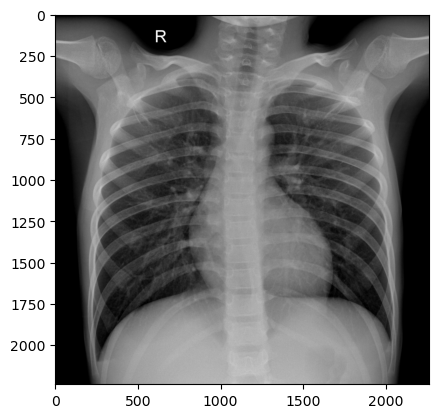

In [5]:
Normal_lung_X_Ray_Image = load_img("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train/NORMAL/IM-0493-0001.jpeg")
print("Normal")
plt.imshow(Normal_lung_X_Ray_Image)
plt.show()

PNEUMONIA


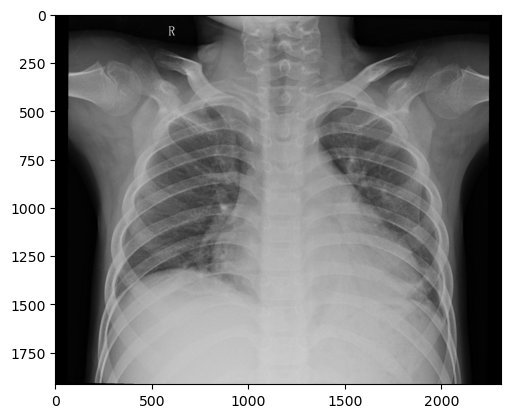

In [6]:
PNEUMONIA_lung_X_Ray_Image = load_img("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train/PNEUMONIA/person467_virus_961.jpeg")
print("PNEUMONIA")
plt.imshow(PNEUMONIA_lung_X_Ray_Image)
plt.show()

## Shuffle the X-Ray Images

In [7]:
random.shuffle(Normal_X_Ray_Images)
random.shuffle(Pneumonia_X_Ray_Images)
images = Normal_X_Ray_Images[:30] + Pneumonia_X_Ray_Images[:30]
images[:20]

['C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train\\NORMAL\\NORMAL2-IM-1282-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train\\NORMAL\\NORMAL2-IM-0842-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/test\\NORMAL\\NORMAL2-IM-0079-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train\\NORMAL\\IM-0255-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/test\\NORMAL\\NORMAL2-IM-0285-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train\\NORMAL\\IM-0147-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train\\NORMAL\\IM-0231-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/val\\NORMAL\\NORMAL2-IM-1442-0001.jpeg',
 'C:/Users/SHIRINDI/OneDrive/Skull documents

## Randomly picking images

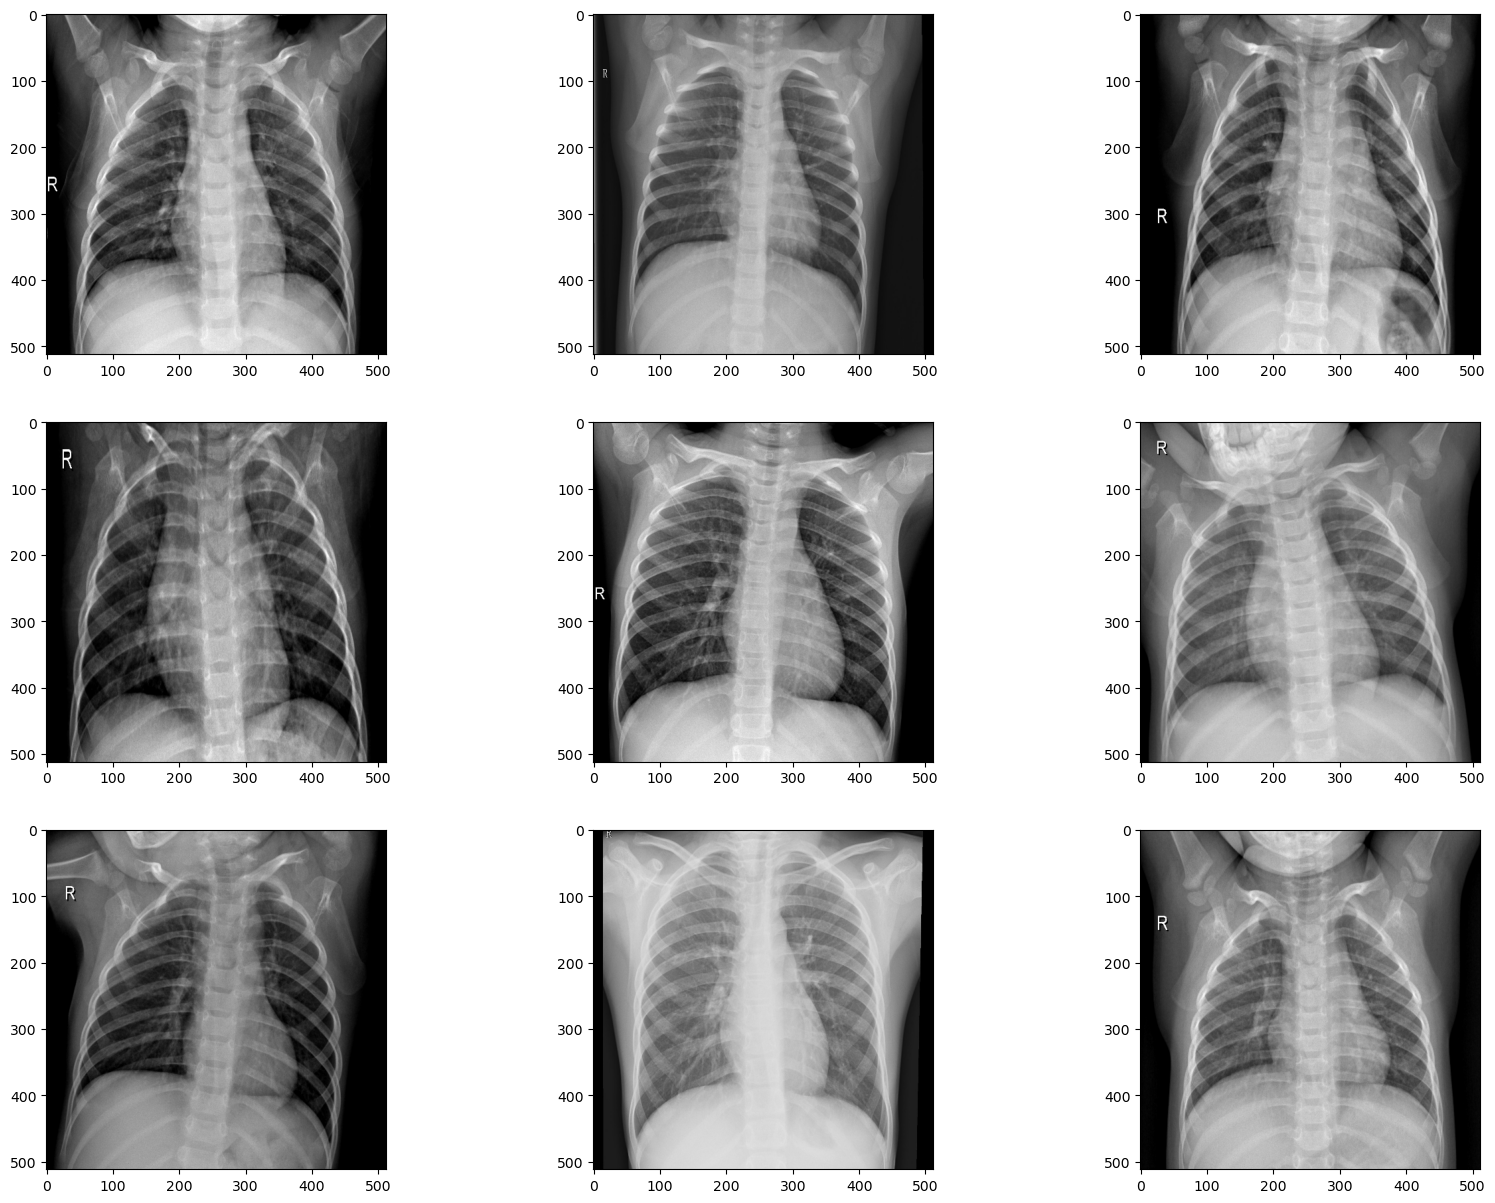

In [8]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1,10 ):
    Display = cv2.imread(images[i])
    Display = cv2.resize(Display, (512, 512))
    fig.add_subplot(rows, columns, i)
    plt.imshow(Display)

### X-Ray data Preprocessing and Transformation

- Rescale images to 1/255  
- Resizing all images to (75, 75)
- Batch size: The number of photos that the generator will produce in each batch.
- Class mode - Categeorical: This represent the 2D outputs (Pneumonia and Normal)

In [9]:
trainData = os.path.join("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/train/")
testData = os.path.join("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/test/")
validationData = os.path.join("C:/Users/SHIRINDI/OneDrive/Skull documents/2023/Semester 1/Project/chest_xray/val/")

In [10]:
def The_ImagesGen(TrainDirectory, TestDirectory, ValidationDirector):
    
    Train_dat = ImageDataGenerator(rescale=1/255)
    Test_dat = ImageDataGenerator(rescale=1/255)
    Val_dat = ImageDataGenerator(rescale=1/255)
    
    Train_DataGen = Train_dat.flow_from_directory(TrainDirectory,
                                  target_size = (75, 75),
                                  batch_size = 16,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    Test_DataGen = Test_dat.flow_from_directory(TestDirectory,
                                 target_size=(75, 75),
                                 batch_size = 16,
                                 class_mode = 'categorical') 
    
    Val_DataGen = Val_dat.flow_from_directory(ValidationDirector,
                                 target_size=(75, 75),
                                 batch_size = 16,
                                 class_mode = 'categorical')
    
    return Train_DataGen, Test_DataGen, Val_DataGen

Train_DataGen, Test_DataGen, Val_DataGen = The_ImagesGen(trainData, testData, validationData)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Modelling 

We are going to model the Standard Convolutional Neural Network (Model A) and Bayesian Convolutional Neural Network (Model B). We Will than compare their performance on the X-Ray imagines while classifying the Pneumonia disease. The figures below shows the difference modelling of the Standard Convolutional Neural Network and Bayesian Convolutional Neural Network. The left figure  represent the Standard Convolutional Neural Network with a single point estimates as weight. While on the other hand, represent the Bayesian Convolutional Neural Network with probability distribution over weights.

![Standard CNN vs Bayesian CNN](https://miro.medium.com/v2/resize:fit:1200/1*n6Td0BSmvCGaTYaIJEqF-g.png)

## Model A (Standard Convolutional Neural Network)

A deep learning system known as a convolutional neural network can differentiate different parts of an input image. Convolutional neural network learns directly from the given data. The use of convolutional neural network for object, class, and category recognition in photos is highly advantageous. As a group we saw it fit to consider the use of Standard convolutional neural network on our project, because our project deals with image processing and standard convolutional neural network is one of the highly recommended model for image processing.

## The model uses two activation functions:

The first one, is the Softmax activation function which is used at the output layers. The softmax activation function transforms a vector of numbers into a vector of probabilities, where the probability of each value are inversely proportional to the relative scale of each value in the vector. We use the softmax activation function becouse for each i, we have 0 < softmax(ni) < 1. This means that the output value is the probability distribution over the output nodes. The softmax(ni) will be the probability output node of being correct.

The second activation function is Relu in the hidden layers. To prevent the issue of disappearing gradients and for faster computation, we apply ReLU in the hidden layer. ReLU assists in preventing the exponential increase in computing needed to run the neural network.

In [11]:
StandardCNN_model = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')
])
StandardCNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

## Compiling the model

We are going to use the lost funtion called cross-entropy loss. The cross-entropy loss function may be applied if the one-hot encoding of the output values is employed.

Optimzer - Adam. The Adam is the most effective optimizer to choose as we want to train the neural network more quickly and effectively.

Metric - Accuracy. Given that this is a classification task of the disease and the data are almost uniformly distributed, the accuracy metric is employed. The accurarcy formula is given by: Accuracy = Total number of correct prediction/the total number of prediction.



In [12]:
StandardCNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Lets train the Model

Model Checkpoint: The model does improve during the training. The model improvement is determined by the increase in accurance and derease in loss. Using accuracy as a validation parameter, generalizability is assessed. A more accurate notion of generalizability is provided by validation metrics.


In [13]:
CNN_checkpoint = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [14]:
start = time.time()
history = StandardCNN_model.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [CNN_checkpoint])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.7312
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 220ms/step - loss: 0.6658 - accuracy: 0.7312 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.6287 - accuracy: 0.7500
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 212ms/step - loss: 0.6287 - accuracy: 0.7500 - val_loss: 0.7914 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.5852 - accuracy: 0.7312
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 175ms/step - loss: 0.5852 - accuracy: 0.7312 - val_loss: 0.8795 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.7375
Epoch 4: val_accuracy did not improve fro

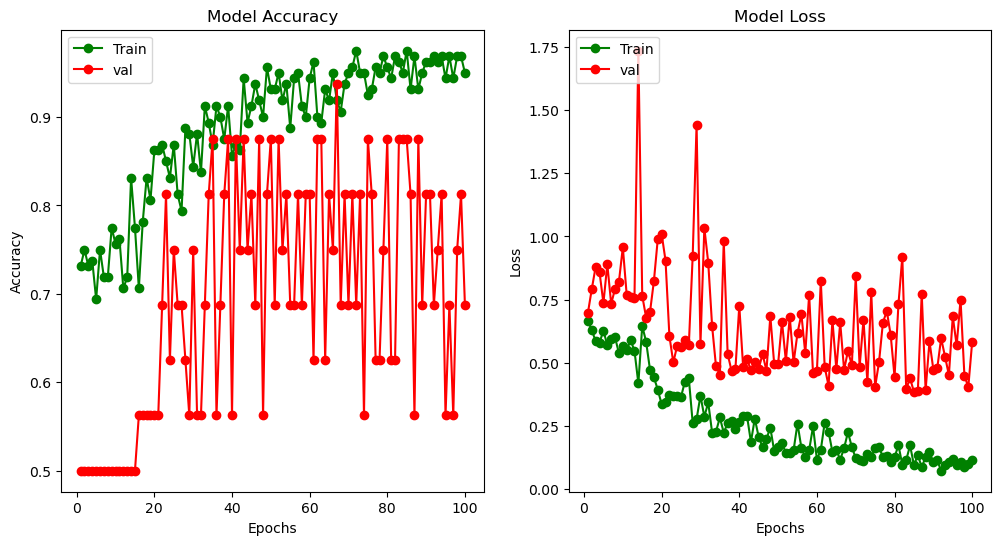

In [15]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Evaluate the Model on the Test dataset

In [16]:
test_loss, test_accuracy = StandardCNN_model.evaluate(Test_DataGen, steps = 30)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

30/30 [==============================] - 4s 145ms/step - loss: 1.0054 - accuracy: 0.7250
The testing accuracy is:  72.50000238418579 %
The testing loss is:  100.53912401199341 %


## we save our first model

In [17]:
StandardCNN_model.save('Pneumonia_Lung_Disease.h5')

## Pneumonia lung disease model Prediction

In [18]:
def Pneumonia_lung_disease(X_Ray_images, Categories):
    
    #Read the X-Ray Image dataset
    X_ray_Imagess = cv2.imread(X_Ray_images)
    X_ray_Imagess = cv2.cvtColor(X_ray_Imagess, cv2.COLOR_BGR2RGB) 
    
    #Display the X-Ray image
    plt.imshow(X_ray_Imagess)
    plt.axis('off')
    
    # Propare X-Ray image format
    X_ray_Imagess_resize = (cv2.resize(X_ray_Imagess, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255
    
    X_ray_Imagess_reshape = X_ray_Imagess_resize[np.newaxis,...]
    
    #Lets predict the X-Ray Images
    prediction_X_Ray_Images = StandardCNN_model.predict(X_ray_Imagess_reshape)
    print(prediction_X_Ray_Images)
    
    Categoty_predictionOfX_Ray_Images = Categories[np.argmax(prediction_X_Ray_Images)]
    
    return Categoty_predictionOfX_Ray_Images

In [19]:
Categories = os.listdir(testData)

## Our Model first prediction on whether the lung have Pneumonia or is normal

In [20]:
Pneumonia_Prediction = os.path.join(testData+'PNEUMONIA/person15_virus_46.jpeg')
Pneumonia_Prediction1 = os.path.join(testData+'PNEUMONIA/person161_bacteria_757.jpeg')
Normal_prediction = os.path.join(testData+'NORMAL/NORMAL2-IM-0354-0001.jpeg')
Normal_prediction1 = os.path.join(testData+'NORMAL/NORMAL2-IM-0337-0001.jpeg')

In [21]:
pd.options.display.float_format = '{:.2f}'.format

1/1 [==============================] - 0s 111ms/step
[[6.5021537e-05 9.9993503e-01]]


'PNEUMONIA'

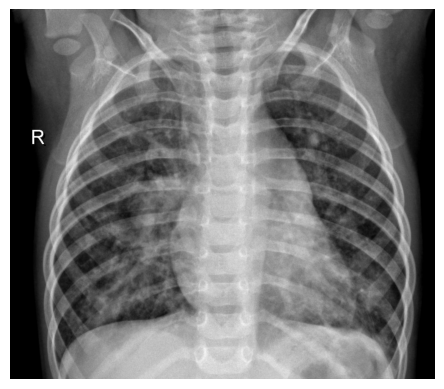

In [22]:
First_prediction = Pneumonia_lung_disease(Pneumonia_Prediction, Categories)
First_prediction

1/1 [==============================] - 0s 29ms/step
[[0.00202835 0.9979716 ]]


'PNEUMONIA'

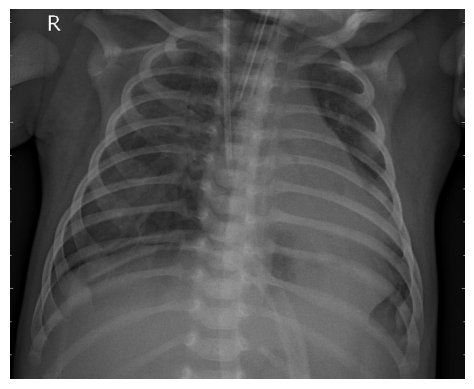

In [23]:
Second_prediction = Pneumonia_lung_disease(Pneumonia_Prediction1, Categories)
First_prediction

1/1 [==============================] - 0s 20ms/step
[[0.9468317  0.05316824]]


'NORMAL'

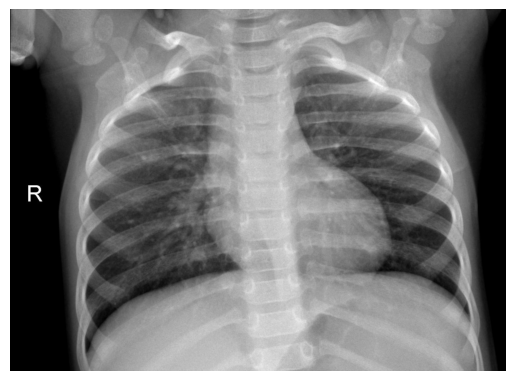

In [24]:
Second_prediction = Pneumonia_lung_disease(Normal_prediction, Categories)
Second_prediction

1/1 [==============================] - 0s 23ms/step
[[0.8797465  0.12025348]]


'NORMAL'

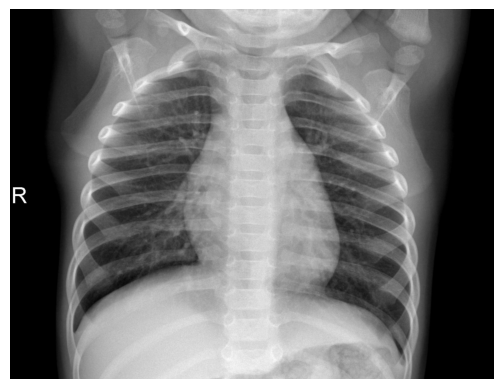

In [25]:
Second_prediction = Pneumonia_lung_disease(Normal_prediction1, Categories)
Second_prediction

## Model B (Bayesian Convolutional Neural Network)

We introduce the Bayesian Convolutional neural network becouse the standard convolutional neural network requires large dataset to train the model to reduce the chances of the model overfitting. The x-ray dataset are quite small. We want to introduce the Bayesian Convolutional neural network statistic to the dataset. This model use statistical techniques to deal with a probability distribution related to the network and its parameters. This helps to reduce the chances of the model overfitting while using small data.

When a model is overtrained or Overfitted on the dataset, it simply means that the model has learned the dataset too closely. This results as the classifier performing less when used to classify previously unknown dataset. This frequently prevents it from accurately analyzing the uncertainty in the training data and model predictions, which results in decisions that are made with an excessive amount of confidence over what the proper classification or prediction may be. The Bayesian statistic model introduce the estimation of the uncertainty in prediction by allowing the calculation of uncertainty in the model's predictions. The Bayesian convolution neural network consider two uncertainty: Aleatoric uncertainty and Epistemic uncertainty. 

In [26]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

In [27]:
BayesianCNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization (  (None, 60, 60, 8)        12304     
 Conv2DReparameterization)                                       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                      

## Compiling the Bayesian Convolutional Neural Network

In [28]:
def BayesianCNN_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

BayesianCNN_model.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.05),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

## Lets train the Bayesian Convolutional Neural Network

In [29]:
BayesianCNN_checkpoint = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [30]:
start = time.time()
History_BayesianCNN = BayesianCNN_model.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_checkpoint],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 31.0300 - accuracy: 0.6156
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 56s 164ms/step - loss: 31.0300 - accuracy: 0.6156 - val_loss: 12.5714 - val_accuracy: 0.5000
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 10.9793 - accuracy: 0.6150
Epoch 2: val_accuracy did not improve from 0.50000
326/326 [==============================] - 53s 161ms/step - loss: 10.9793 - accuracy: 0.6150 - val_loss: 10.0409 - val_accuracy: 0.5000
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 8.7892 - accuracy: 0.6150
Epoch 3: val_accuracy improved from 0.50000 to 0.56250, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 52s 161ms/step - loss: 8.7892 - accuracy: 0.6150 - val_loss: 8.0565 - val_accuracy: 0.5625
Epoch 4/100
326/326 [==============================] - ETA: 0s 

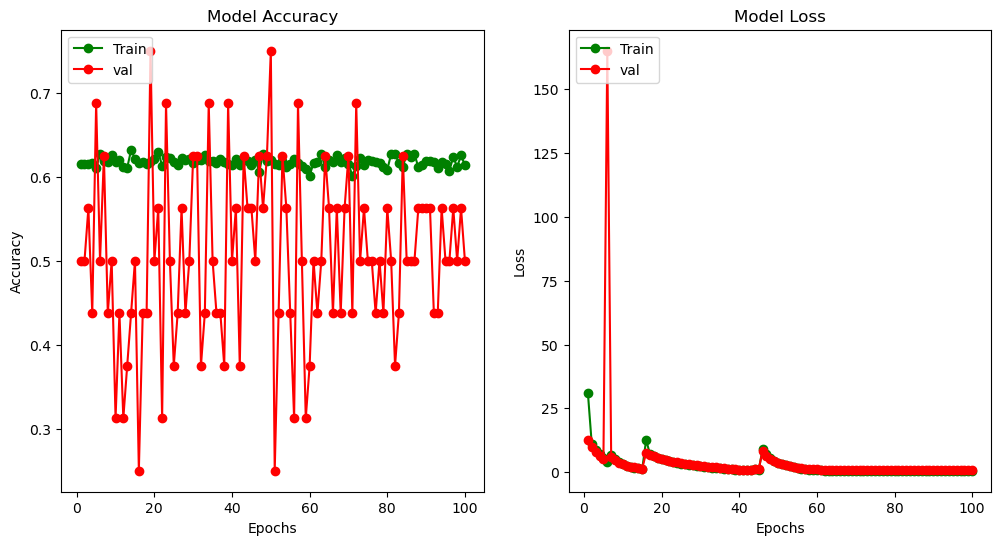

In [31]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [32]:
test_loss, test_accuracy = BayesianCNN_model.evaluate(Test_DataGen, steps = 30)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

30/30 [==============================] - 5s 167ms/step - loss: 0.7060 - accuracy: 0.5417
The testing accuracy is:  54.16666865348816 %
The testing loss is:  70.60369849205017 %


## we save the Bayesian Convolutional Neural Network

In [33]:
BayesianCNN_model.save('Pneumonia_disease_BCNN_model.h5')

## Pneumonia lung disease model Prediction

The interpretation of the model predictions:

As we have contructed the probability model. It wont be possible to get the same probability value when predicting an image. Due to that, we assign the model to forecast our x-ray images multiple times rather than just once. Instead of only once, the model will have to forecast a single x-ray image 300 times. 

A 97.5% prediction interval for probability will be generated using those 300 forecasts.
We are 97.5% confident that an image categorization probability will fall within a given range.

In [34]:
def BayesianCNN_model_prediction(Predicted_image, Predicted_image_label):

    #read image
    X_Ray_predicted_image = cv2.imread(Predicted_image)
    X_Ray_predicted_image = cv2.cvtColor(X_Ray_predicted_image, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(X_Ray_predicted_image)
    plt.axis('off')
    
    X_RayImage_resize = (cv2.resize(X_Ray_predicted_image, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    Image_probabilities = np.empty(shape=(300, 2))
    
    for i in range(300):
        
        Image_probabilities[i] = BayesianCNN_model(X_RayImage_resize[np.newaxis,...]).mean().numpy()[0]
        
    Pictures = np.array([np.percentile(Image_probabilities[:, i], 2.5) for i in range(2)])
    Picture = np.array([np.percentile(Image_probabilities[:, i], 97.5) for i in range(2)])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar = ax.bar(np.arange(2), Picture, color='red')
    bar[Predicted_image_label].set_color('green')
    bar = ax.bar(np.arange(2), Pictures-0.02, color='white', linewidth=1, edgecolor='white')
    ax.set_xticklabels([''] + [x for x in Categories])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    plt.show()
    
    MeanEstim = np.array([np.mean(Image_probabilities[:, i]) for i in range(2)])*100
    Predictionlabel = Categories[np.argmax(MeanEstim)]
    MaximumPred = MeanEstim.max()
    print("Probability of Pneumonia Condition:", Predictionlabel, "-", round(MaximumPred,2), "%")
    Pictures1 = Pictures*100
    Picture1 = Picture*100
    for i in range(2):
        print(Categories[i], ": Average estimate = ", round(MeanEstim[i],2),
             ": 97.5% ", round(Pictures1[i], 2), "-", round(Picture1[i], 2))

In [35]:
Pneumonia_Prediction1 = os.path.join(testData+'PNEUMONIA/person89_bacteria_440.jpeg')
Pneumonia_Prediction2 = os.path.join(testData+'PNEUMONIA/person91_bacteria_446.jpeg')
Normal_prediction3 = os.path.join(testData+'NORMAL/NORMAL2-IM-0354-0001.jpeg')
Normal_prediction4 = os.path.join(testData+'NORMAL/NORMAL2-IM-0352-0001.jpeg')

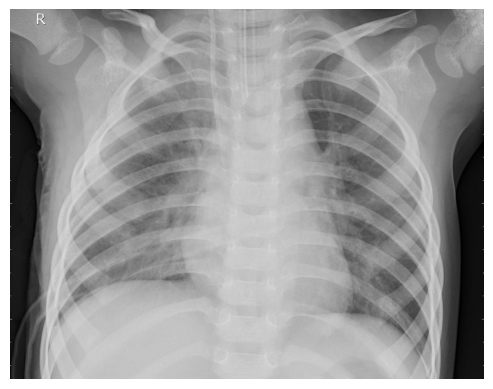

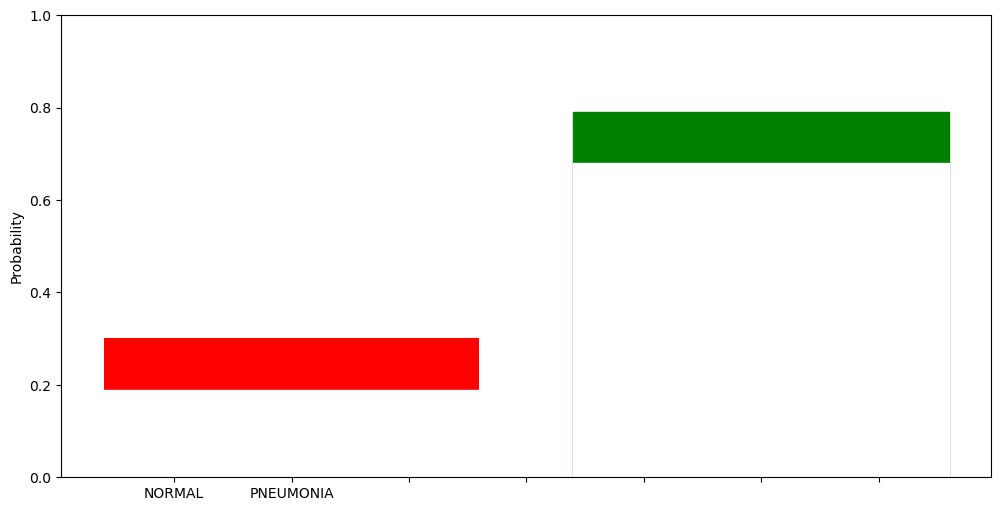

Probability of Pneumonia Condition: PNEUMONIA - 74.69 %
NORMAL : Average estimate =  25.31 : 97.5%  20.88 - 30.06
PNEUMONIA : Average estimate =  74.69 : 97.5%  69.94 - 79.12


In [36]:
BayesianCNN_model_prediction(Pneumonia_Prediction1, Categories.index('PNEUMONIA'))

### Interpretation of the results:


PNEUMONIA: Due to the given results above (PNEUMONIA Image), there is 97.5% likelihood (certainty) that the PNEUMONIA Classification probability will fall within the range of 69.85% – 79.67%.

Normal: Due to the given results above (Normal Image), there is 97.5% likelihood (certainty) that the Normal Classification probability will fall between 20.33% - 30.15%.

Looking at the output of our model prediction, we can see that there is epistemic and aleatoric uncertainty in the prediction of the PNEUMONIA image:

The model also gives the Normal class a midium probability value, illustrating the aleatoric uncertainty.

The epistemic uncertainty is demonstrated by the model's inability to determine the appropriate probability value for each of the two kinds of PNEUMONIA lung disease (PNEUMONIA and normal).

The remaining pictures forecasts have the same meaning.

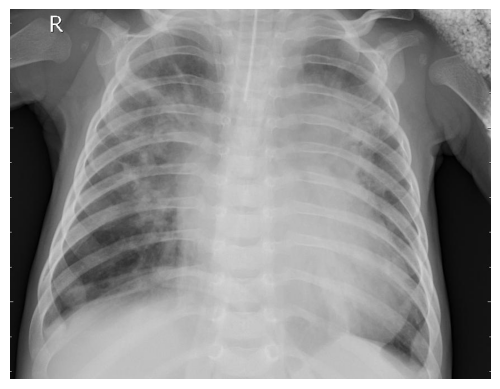

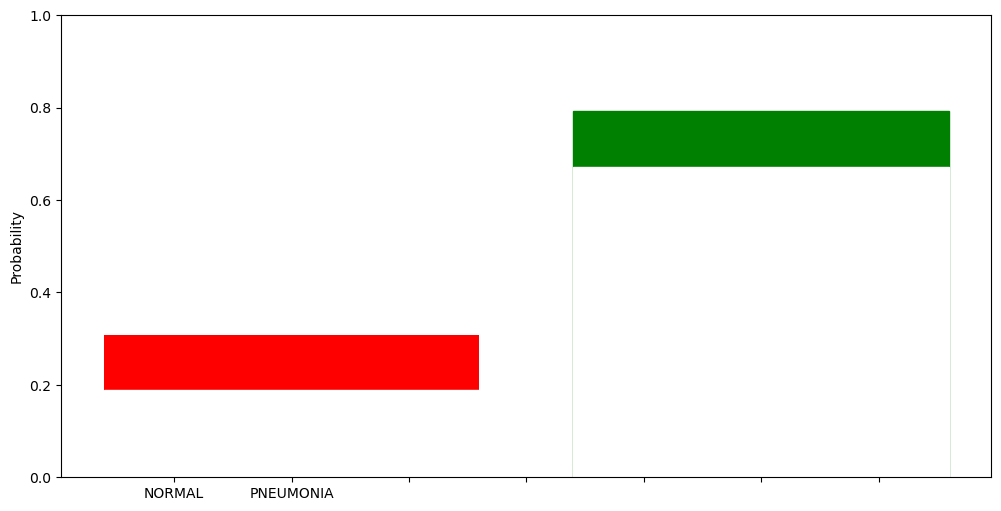

Probability of Pneumonia Condition: PNEUMONIA - 74.42 %
NORMAL : Average estimate =  25.58 : 97.5%  20.79 - 30.73
PNEUMONIA : Average estimate =  74.42 : 97.5%  69.27 - 79.21


In [37]:
BayesianCNN_model_prediction(Pneumonia_Prediction2, Categories.index('PNEUMONIA'))

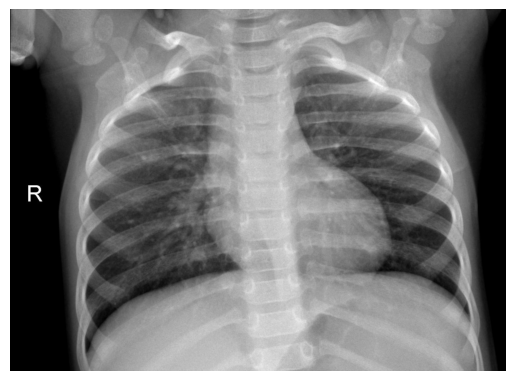

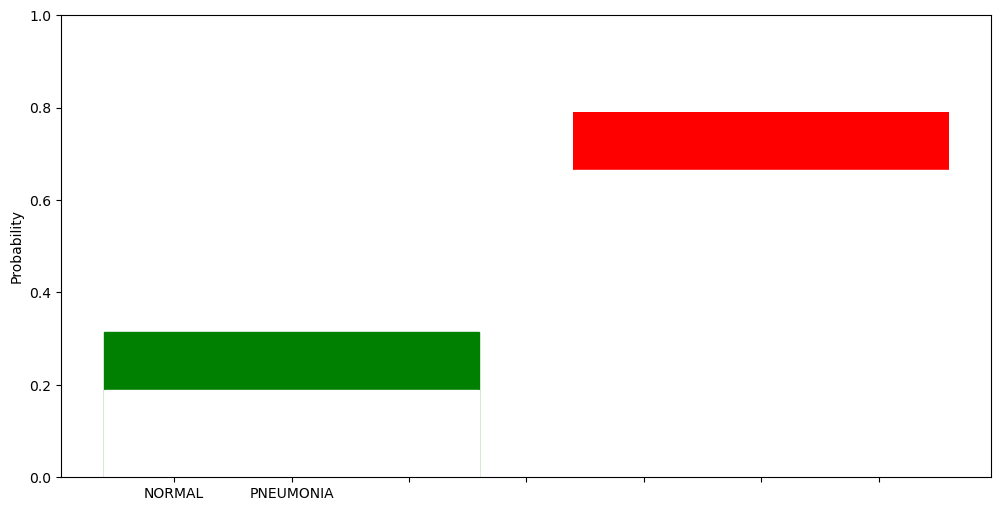

Probability of Pneumonia Condition: PNEUMONIA - 74.29 %
NORMAL : Average estimate =  25.71 : 97.5%  20.98 - 31.45
PNEUMONIA : Average estimate =  74.29 : 97.5%  68.55 - 79.02


In [38]:
BayesianCNN_model_prediction(Normal_prediction3, Categories.index('NORMAL'))

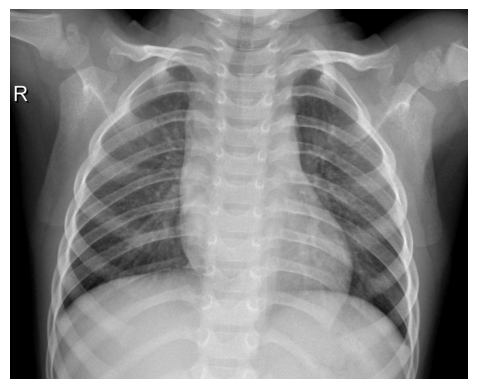

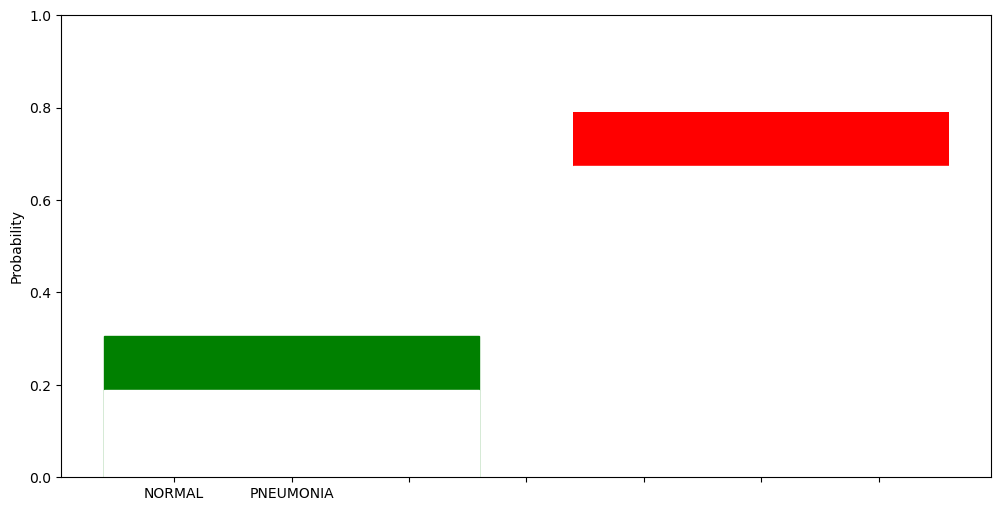

Probability of Pneumonia Condition: PNEUMONIA - 74.53 %
NORMAL : Average estimate =  25.47 : 97.5%  20.86 - 30.63
PNEUMONIA : Average estimate =  74.53 : 97.5%  69.37 - 79.14


In [39]:
BayesianCNN_model_prediction(Normal_prediction4, Categories.index('NORMAL'))

## Experimentation of the models


###  hyperparameters to tune

we first adjust the number of neurons in each layer before adjusting the learning rate in the final set of tests.

## Experiment number 1 for model B: (Bayesian Convolutional Neural Network)

We adjust the number of neurons to 64.

In [40]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model_Experiment_No1 = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

BayesianCNN_model_Experiment_No1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_1  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        4672      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        36928     
                                                      

In [41]:
BayesianCNN_model_Experiment_No1.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.05),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [42]:
BayesianCNN_Checkpoint_Experiment_No1 = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [43]:
start = time.time()
History_BayesianCNN_ExperimentNo1 = BayesianCNN_model_Experiment_No1.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_Checkpoint_Experiment_No1],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 641.1556 - accuracy: 0.6202
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 56s 166ms/step - loss: 641.1556 - accuracy: 0.6202 - val_loss: 8.1128 - val_accuracy: 0.5625
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 56.2655 - accuracy: 0.6045
Epoch 2: val_accuracy did not improve from 0.56250
326/326 [==============================] - 54s 166ms/step - loss: 56.2655 - accuracy: 0.6045 - val_loss: 9.1635 - val_accuracy: 0.5000
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 8.5990 - accuracy: 0.6133
Epoch 3: val_accuracy did not improve from 0.56250
326/326 [==============================] - 54s 166ms/step - loss: 8.5990 - accuracy: 0.6133 - val_loss: 8.4890 - val_accuracy: 0.5000
Epoch 4/100
326/326 [==============================] - ETA: 0s - loss: 8.0231 - accuracy: 0.6198
Epoch 4: v

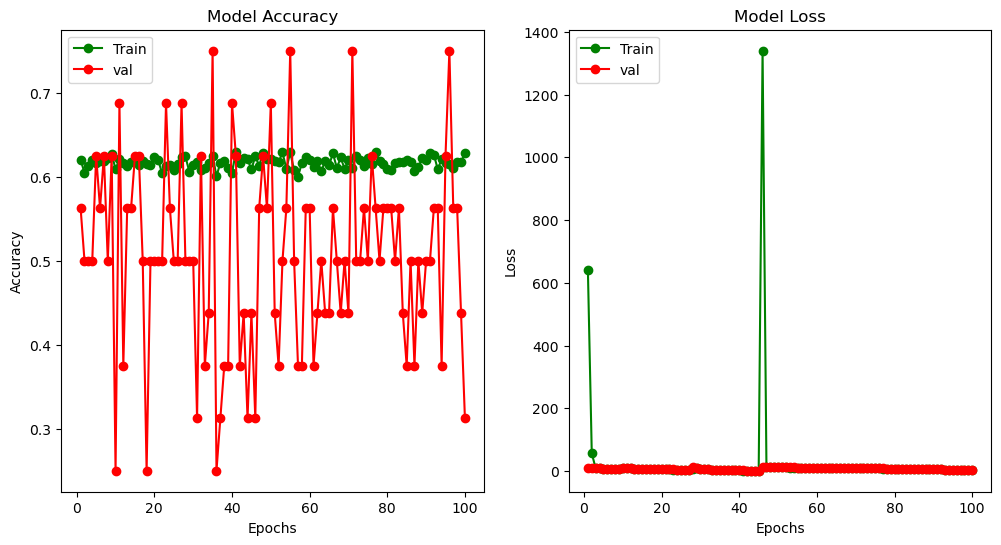

In [44]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN_ExperimentNo1.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo1.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN_ExperimentNo1.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo1.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 2: (Model B)

We adjust the number of neurons to 128.

In [45]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model_Experiment_No2 = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

BayesianCNN_model_Experiment_No2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_2  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       9344      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       147584    
                                                      

In [46]:
BayesianCNN_model_Experiment_No2.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.05),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [47]:
BayesianCNN_Checkpoint_Experiment_No2 = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [48]:
start = time.time()
History_BayesianCNN_ExperimentNo2 = BayesianCNN_model_Experiment_No2.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_Checkpoint_Experiment_No2],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 1917.9479 - accuracy: 0.6020
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 56s 166ms/step - loss: 1917.9479 - accuracy: 0.6020 - val_loss: 17.0229 - val_accuracy: 0.5625
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 15.9664 - accuracy: 0.6250
Epoch 2: val_accuracy did not improve from 0.56250
326/326 [==============================] - 53s 162ms/step - loss: 15.9664 - accuracy: 0.6250 - val_loss: 15.6914 - val_accuracy: 0.4375
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 19.1600 - accuracy: 0.6181
Epoch 3: val_accuracy did not improve from 0.56250
326/326 [==============================] - 52s 159ms/step - loss: 19.1600 - accuracy: 0.6181 - val_loss: 17.4149 - val_accuracy: 0.5000
Epoch 4/100
326/326 [==============================] - ETA: 0s - loss: 16.9598 - accuracy: 0.6171
Ep

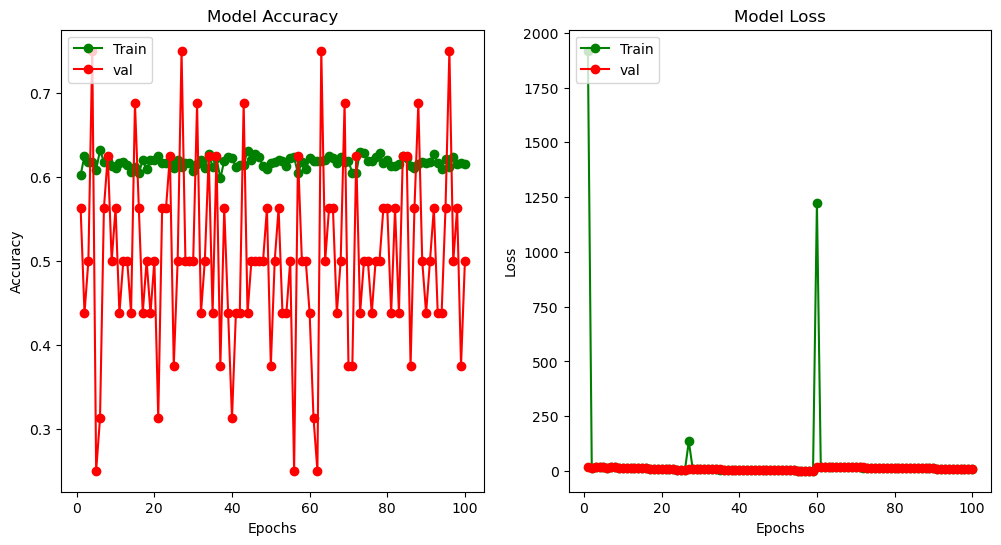

In [49]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN_ExperimentNo2.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo2.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN_ExperimentNo2.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo2.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 3: (Model B)

We adjust the number of neurons to 256.

In [50]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model_Experiment_No3 = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

BayesianCNN_model_Experiment_No3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_3  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 256)       18688     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 256)       590080    
                                                      

In [51]:
BayesianCNN_model_Experiment_No3.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.05),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [52]:
BayesianCNN_Checkpoint_Experiment_No3 = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [53]:
start = time.time()
History_BayesianCNN_ExperimentNo3= BayesianCNN_model_Experiment_No3.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_Checkpoint_Experiment_No3],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 4181.9546 - accuracy: 0.6137
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 64s 190ms/step - loss: 4181.9546 - accuracy: 0.6137 - val_loss: 20.2742 - val_accuracy: 0.6250
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 19.5694 - accuracy: 0.6191
Epoch 2: val_accuracy did not improve from 0.62500
326/326 [==============================] - 61s 186ms/step - loss: 19.5694 - accuracy: 0.6191 - val_loss: 19.3786 - val_accuracy: 0.5625
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 18.8242 - accuracy: 0.6200
Epoch 3: val_accuracy did not improve from 0.62500
326/326 [==============================] - 61s 187ms/step - loss: 18.8242 - accuracy: 0.6200 - val_loss: 19.1992 - val_accuracy: 0.4375
Epoch 4/100
326/326 [==============================] - ETA: 0s - loss: 23.7562 - accuracy: 0.6242
Ep

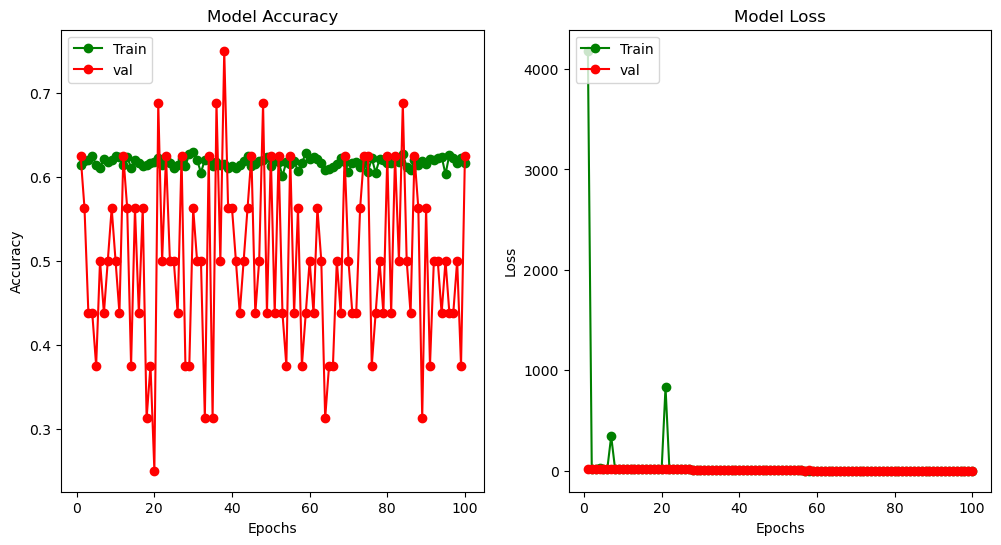

In [54]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN_ExperimentNo3.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo3.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN_ExperimentNo3.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo3.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 4: (Model B)

We adjust the learning rate to 0.001.

In [55]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model_Experiment_No4 = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

BayesianCNN_model_Experiment_No4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_4  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 64)        18496     
                                                      

In [56]:
BayesianCNN_model_Experiment_No4.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.001),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [57]:
BayesianCNN_Checkpoint_Experiment_No4 = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [58]:
start = time.time()
History_BayesianCNN_ExperimentNo4= BayesianCNN_model_Experiment_No4.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_Checkpoint_Experiment_No4],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 24.8275 - accuracy: 0.6963
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 52s 154ms/step - loss: 24.8275 - accuracy: 0.6963 - val_loss: 23.3282 - val_accuracy: 0.5625
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 21.6840 - accuracy: 0.8934
Epoch 2: val_accuracy improved from 0.56250 to 0.87500, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 49s 151ms/step - loss: 21.6840 - accuracy: 0.8934 - val_loss: 20.5209 - val_accuracy: 0.8750
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 18.8444 - accuracy: 0.9172
Epoch 3: val_accuracy improved from 0.87500 to 0.93750, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 49s 150ms/step - loss: 18.8444 - accuracy: 0.9172 - val_loss: 17.4923 - val_accuracy: 0.9375
Epoch 4/100
326/

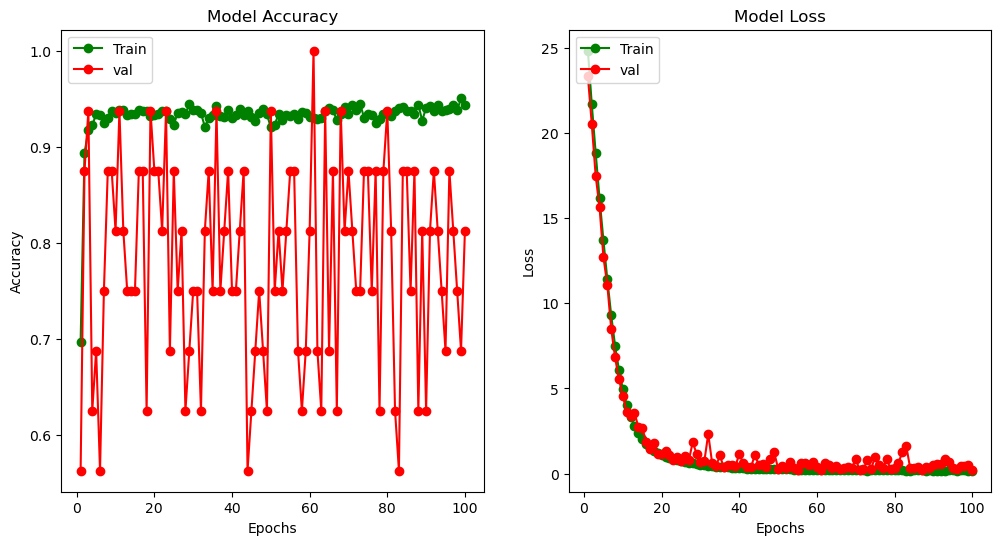

In [59]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN_ExperimentNo4.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo4.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN_ExperimentNo4.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo4.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 5: (Model B)

We adjust the learning rate to 0.01.

In [60]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model_Experiment_No5 = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

BayesianCNN_model_Experiment_No5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_5  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        18496     
                                                      

In [61]:
BayesianCNN_model_Experiment_No5.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.01),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [62]:
BayesianCNN_Checkpoint_Experiment_No5 = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [63]:
start = time.time()
History_BayesianCNN_ExperimentNo5= BayesianCNN_model_Experiment_No5.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_Checkpoint_Experiment_No5],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 17.3276 - accuracy: 0.6095
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 52s 156ms/step - loss: 17.3276 - accuracy: 0.6095 - val_loss: 9.1445 - val_accuracy: 0.4375
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 5.6317 - accuracy: 0.6123
Epoch 2: val_accuracy did not improve from 0.43750
326/326 [==============================] - 49s 150ms/step - loss: 5.6317 - accuracy: 0.6123 - val_loss: 3.8065 - val_accuracy: 0.4375
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 2.4082 - accuracy: 0.6091
Epoch 3: val_accuracy did not improve from 0.43750
326/326 [==============================] - 49s 149ms/step - loss: 2.4082 - accuracy: 0.6091 - val_loss: 1.9500 - val_accuracy: 0.3750
Epoch 4/100
326/326 [==============================] - ETA: 0s - loss: 1.3160 - accuracy: 0.6079
Epoch 4: val_a

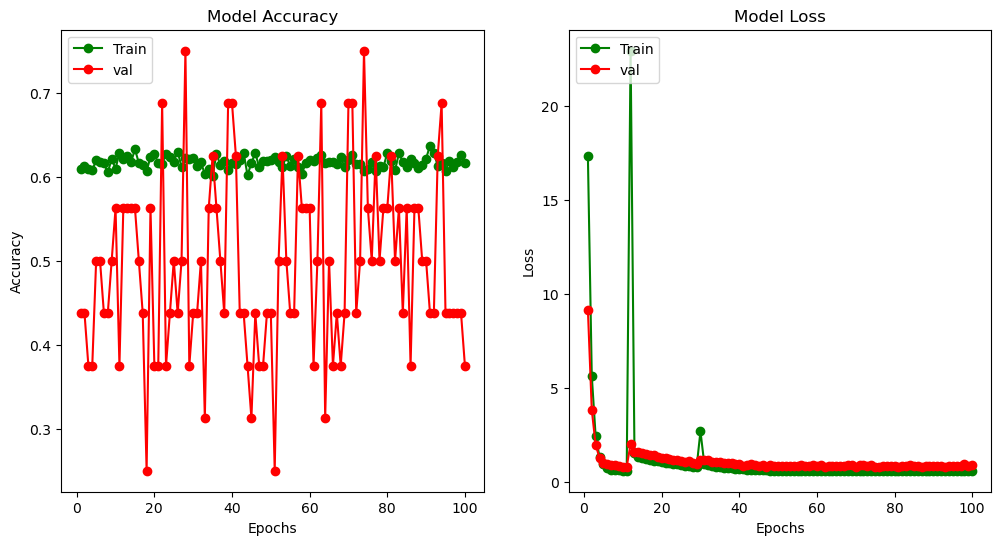

In [64]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN_ExperimentNo5.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo5.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN_ExperimentNo5.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo5.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 6: (Model B)

We adjust the learning rate to 0.1.

In [65]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model_Experiment_No6 = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

BayesianCNN_model_Experiment_No6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_6  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)        18496     
                                                      

In [66]:
BayesianCNN_model_Experiment_No6.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.1),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [67]:
BayesianCNN_Checkpoint_Experiment_No6 = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [68]:
start = time.time()
History_BayesianCNN_ExperimentNo6= BayesianCNN_model_Experiment_No6.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_Checkpoint_Experiment_No6],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 5491.6455 - accuracy: 0.6005
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 51s 153ms/step - loss: 5491.6455 - accuracy: 0.6005 - val_loss: 23.3818 - val_accuracy: 0.3750
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 22.5435 - accuracy: 0.6185
Epoch 2: val_accuracy improved from 0.37500 to 0.50000, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 49s 150ms/step - loss: 22.5435 - accuracy: 0.6185 - val_loss: 22.1609 - val_accuracy: 0.5000
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 21.4598 - accuracy: 0.6238
Epoch 3: val_accuracy improved from 0.50000 to 0.56250, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 50s 153ms/step - loss: 21.4598 - accuracy: 0.6238 - val_loss: 21.1473 - val_accuracy: 0.5625
Epoch 4/100


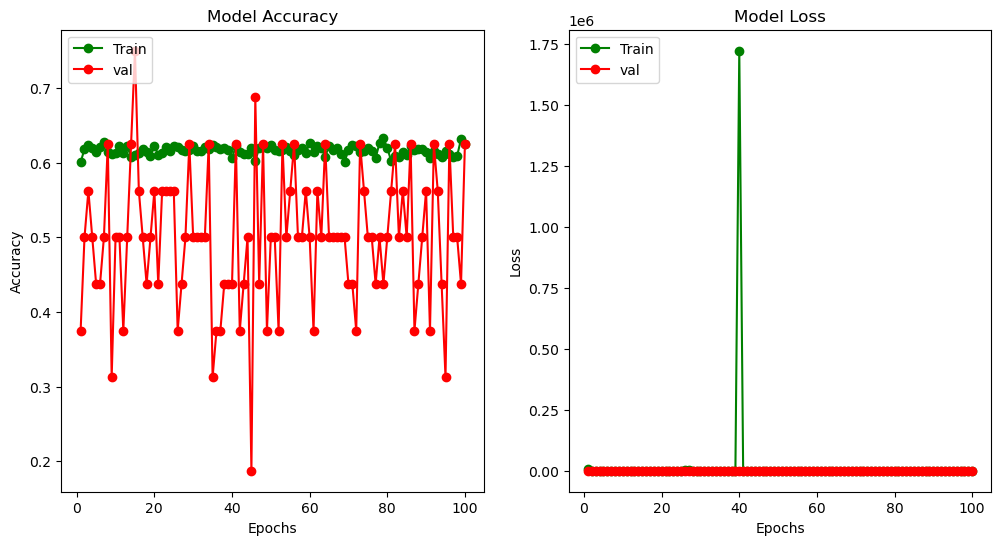

In [69]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN_ExperimentNo6.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo6.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN_ExperimentNo6.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo6.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 7: (Model B)

We adjust the learning rate to 0.0001.

In [70]:
BayesianCNN = lambda x,y,_:tfd.kl_divergence(x,y)/702

BayesianCNN_model_Experiment_No7 = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = BayesianCNN,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = BayesianCNN),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(2), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = BayesianCNN,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = BayesianCNN
                                ),
    tfpl.OneHotCategorical(2)
    
])

BayesianCNN_model_Experiment_No7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_7  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 64)        18496     
                                                      

In [71]:
BayesianCNN_model_Experiment_No7.compile(loss = BayesianCNN_likelihood,
              optimizer = Adam(learning_rate=0.0001),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [72]:
BayesianCNN_Checkpoint_Experiment_No7 = ModelCheckpoint("BayesianCNN_model_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [73]:
start = time.time()
History_BayesianCNN_ExperimentNo7= BayesianCNN_model_Experiment_No7.fit(
      Train_DataGen,
      validation_data = Val_DataGen,
      epochs=100,
      callbacks = [BayesianCNN_Checkpoint_Experiment_No7],
      verbose=1)
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
326/326 [==============================] - ETA: 0s - loss: 26.2277 - accuracy: 0.6630
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 53s 160ms/step - loss: 26.2277 - accuracy: 0.6630 - val_loss: 27.3028 - val_accuracy: 0.6250
Epoch 2/100
326/326 [==============================] - ETA: 0s - loss: 25.7858 - accuracy: 0.7753
Epoch 2: val_accuracy did not improve from 0.62500
326/326 [==============================] - 50s 152ms/step - loss: 25.7858 - accuracy: 0.7753 - val_loss: 25.8025 - val_accuracy: 0.6250
Epoch 3/100
326/326 [==============================] - ETA: 0s - loss: 25.4130 - accuracy: 0.8378
Epoch 3: val_accuracy improved from 0.62500 to 0.75000, saving model to BayesianCNN_model_1.h5
326/326 [==============================] - 50s 154ms/step - loss: 25.4130 - accuracy: 0.8378 - val_loss: 25.5490 - val_accuracy: 0.7500
Epoch 4/100
326/326 [==============================] - ETA: 

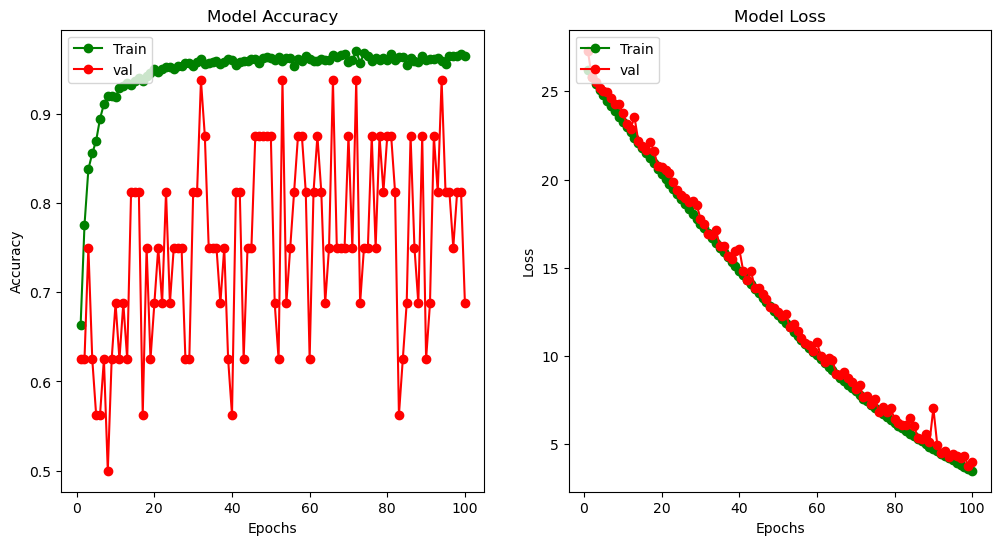

In [74]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_BayesianCNN_ExperimentNo7.history["accuracy"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo7.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_BayesianCNN_ExperimentNo7.history["loss"],"go-")
plt.plot(epochs,History_BayesianCNN_ExperimentNo7.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [75]:
test_loss, test_accuracy = BayesianCNN_model_Experiment_No7.evaluate(Test_DataGen, steps = 30)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")

30/30 [==============================] - 4s 148ms/step - loss: 4.5589 - accuracy: 0.7437
The testing accuracy is:  74.37499761581421 %
The testing loss is:  455.8865547180176 %


## We save the best performance experiment model for our next prediction

In [76]:
def The_BestBayesianCNN_Prediction_Experiment(Predicted_image, Predicted_image_label):

    #read image
    X_Ray_predicted_image = cv2.imread(Predicted_image)
    X_Ray_predicted_image = cv2.cvtColor(X_Ray_predicted_image, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(X_Ray_predicted_image)
    plt.axis('off')
    
    X_RayImage_resize = (cv2.resize(X_Ray_predicted_image, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    Image_probabilities = np.empty(shape=(300, 2))
    
    for i in range(300):
        
        Image_probabilities[i] = BayesianCNN_model_Experiment_No7(X_RayImage_resize[np.newaxis,...]).mean().numpy()[0]
        
    Pictures = np.array([np.percentile(Image_probabilities[:, i], 2.5) for i in range(2)])
    Picture = np.array([np.percentile(Image_probabilities[:, i], 97.5) for i in range(2)])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar = ax.bar(np.arange(2), Picture, color='red')
    bar[Predicted_image_label].set_color('green')
    bar = ax.bar(np.arange(2), Pictures-0.02, color='white', linewidth=1, edgecolor='white')
    ax.set_xticklabels([''] + [x for x in Categories])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    plt.show()
    
    MeanEstim = np.array([np.mean(Image_probabilities[:, i]) for i in range(2)])*100
    Predictionlabel = Categories[np.argmax(MeanEstim)]
    MaximumPred = MeanEstim.max()
    print("Probability of Pneumonia Condition:", Predictionlabel, "-", round(MaximumPred,2), "%")
    Pictures1 = Pictures*100
    Picture1 = Picture*100
    for i in range(2):
        print(Categories[i], ": Average estimate = ", round(MeanEstim[i],2),
             ": 97.5% ", round(Pictures1[i], 2), "-", round(Picture1[i], 2))

## Model A Prediction using the best experiment

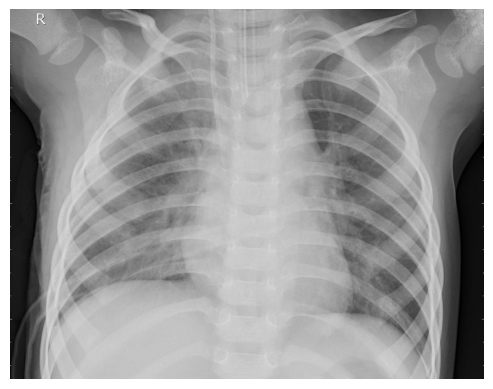

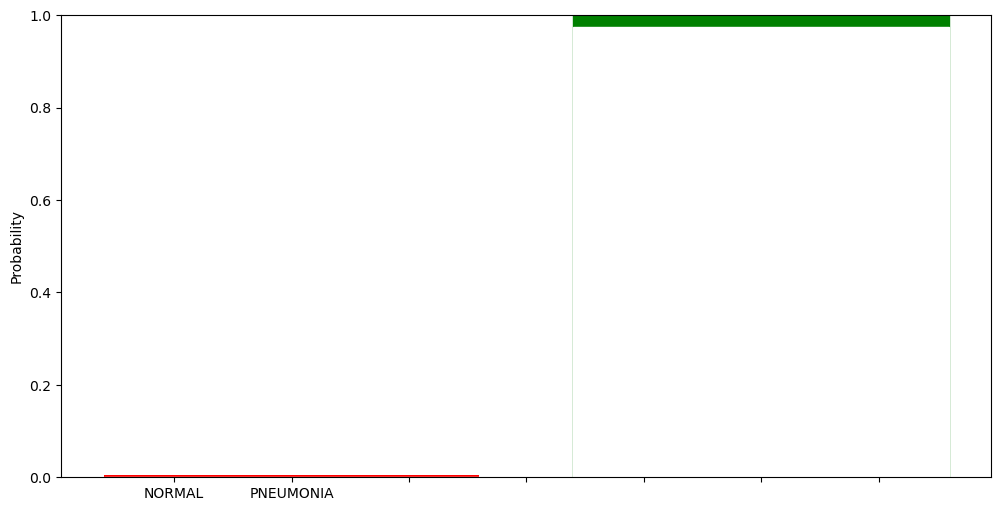

Probability of Pneumonia Condition: PNEUMONIA - 99.9 %
NORMAL : Average estimate =  0.1 : 97.5%  0.0 - 0.5
PNEUMONIA : Average estimate =  99.9 : 97.5%  99.5 - 100.0


In [77]:
The_BestBayesianCNN_Prediction_Experiment(Pneumonia_Prediction1, Categories.index('PNEUMONIA'))

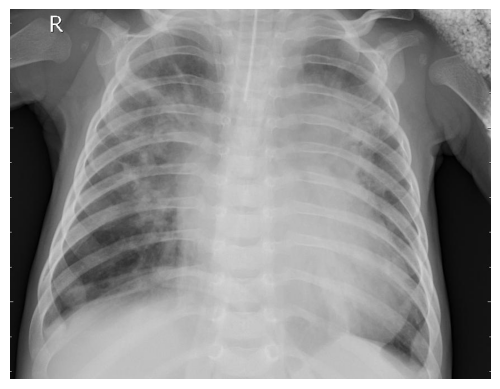

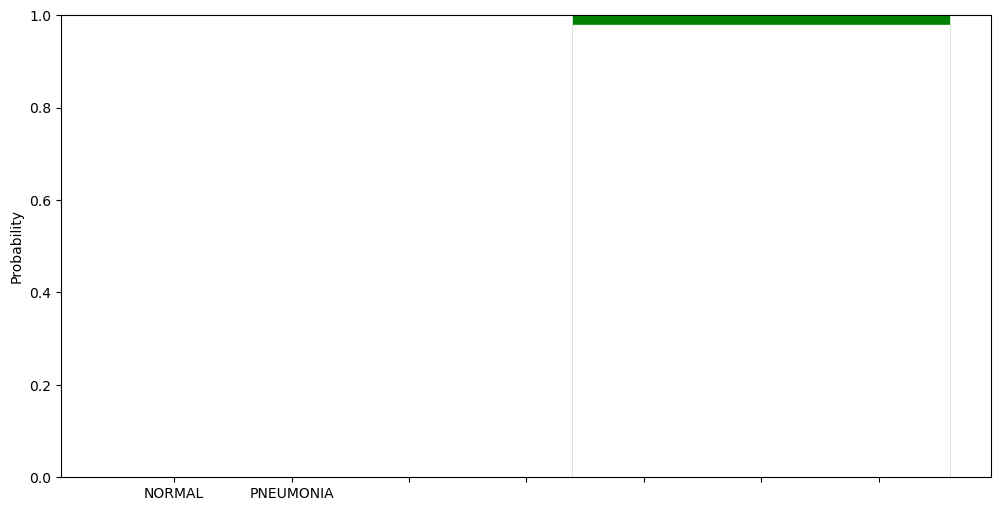

Probability of Pneumonia Condition: PNEUMONIA - 100.0 %
NORMAL : Average estimate =  0.0 : 97.5%  0.0 - 0.0
PNEUMONIA : Average estimate =  100.0 : 97.5%  100.0 - 100.0


In [78]:
The_BestBayesianCNN_Prediction_Experiment(Pneumonia_Prediction2, Categories.index('PNEUMONIA'))

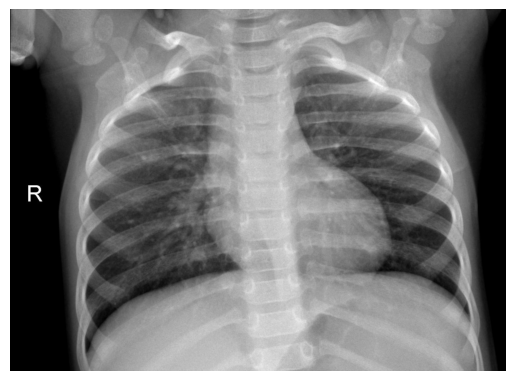

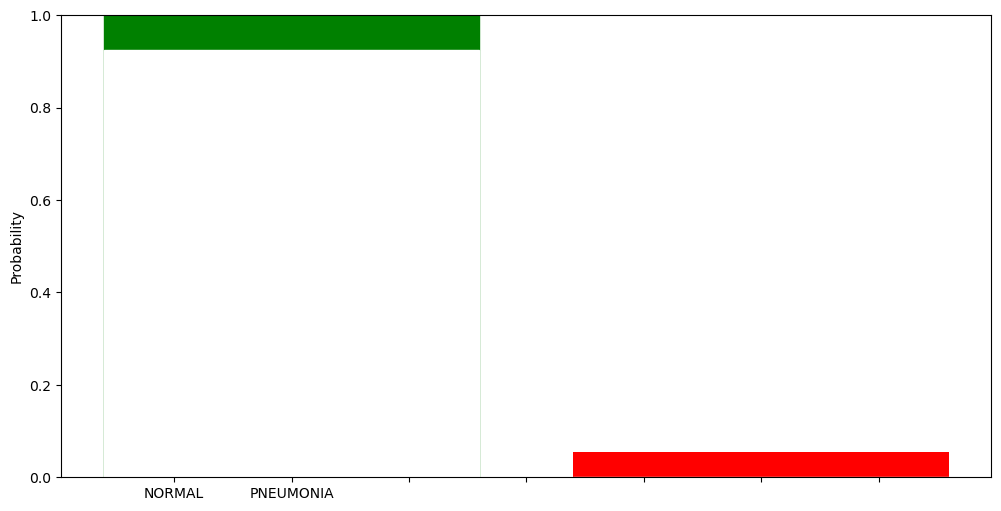

Probability of Pneumonia Condition: NORMAL - 99.39 %
NORMAL : Average estimate =  99.39 : 97.5%  94.54 - 100.0
PNEUMONIA : Average estimate =  0.61 : 97.5%  0.0 - 5.46


In [79]:
The_BestBayesianCNN_Prediction_Experiment(Normal_prediction3, Categories.index('NORMAL'))

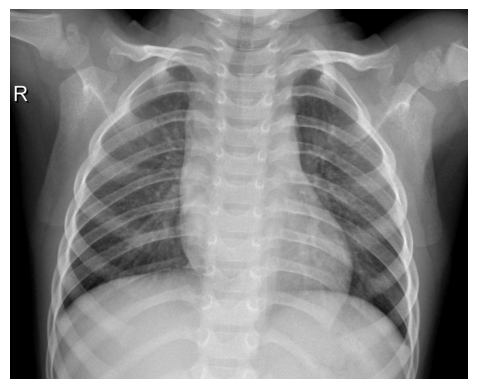

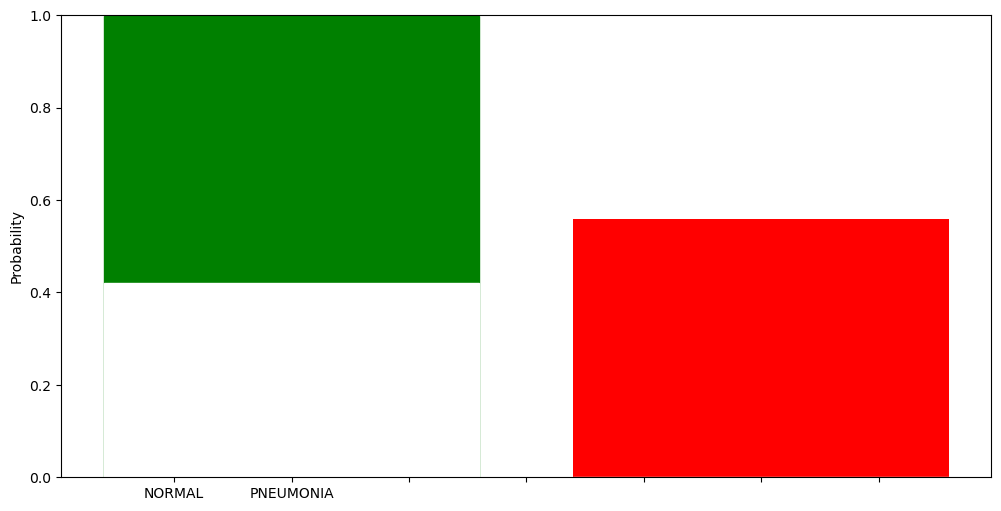

Probability of Pneumonia Condition: NORMAL - 88.11 %
NORMAL : Average estimate =  88.11 : 97.5%  43.99 - 99.81
PNEUMONIA : Average estimate =  11.89 : 97.5%  0.19 - 56.01


In [80]:
The_BestBayesianCNN_Prediction_Experiment(Normal_prediction4, Categories.index('NORMAL'))

## Experiment number 1 For Model A: (standard Convolutional Neural Network)

We adjust the number of neurons to 64.

In [81]:
StandardCNN_model_experimentN01 = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')
   
])
StandardCNN_model_experimentN01.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        4672      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 6, 6, 64)        

In [82]:
StandardCNN_model_experimentN01.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
StandardCNN_checkpoint_experimentNo1 = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [84]:
start = time.time()
History_StandardCNN_ExperimentNo1 = StandardCNN_model_experimentN01.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [StandardCNN_checkpoint_experimentNo1])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 3289.2114 - accuracy: 0.4875
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 207ms/step - loss: 3289.2114 - accuracy: 0.4875 - val_loss: 0.9479 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.5831 - accuracy: 0.7375
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 186ms/step - loss: 0.5831 - accuracy: 0.7375 - val_loss: 0.8833 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.5863 - accuracy: 0.7563
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 220ms/step - loss: 0.5863 - accuracy: 0.7563 - val_loss: 32.3565 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 5.3237 - accuracy: 0.7000
Epoch 4: val_accuracy did not impr

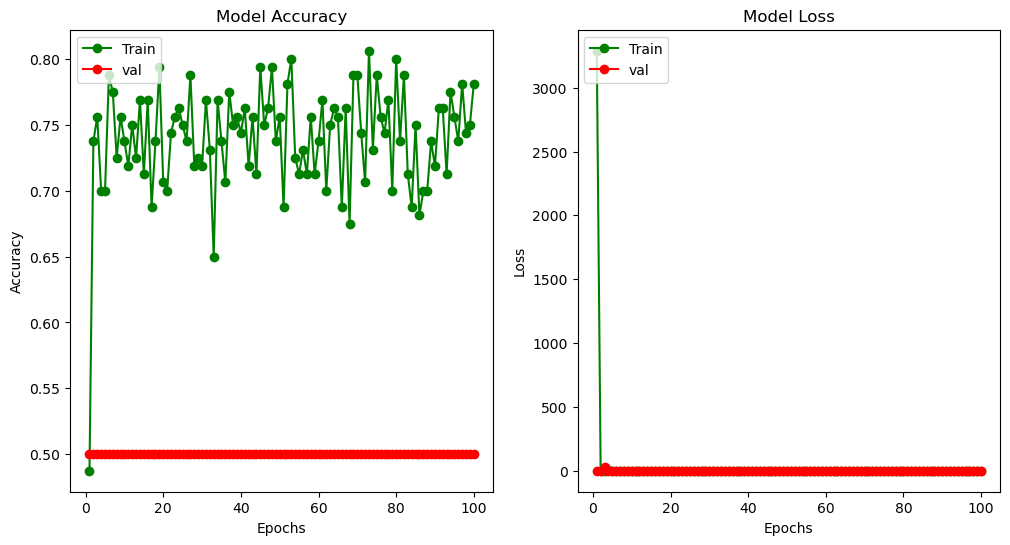

In [85]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_StandardCNN_ExperimentNo1.history["accuracy"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo1.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_StandardCNN_ExperimentNo1.history["loss"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo1.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 2: (Model A)

We adjust the number of neurons to 128.

In [86]:
StandardCNN_model_experimentN02 = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')

])
StandardCNN_model_experimentN02.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 128)       9344      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 6, 6, 128)      

In [87]:
StandardCNN_model_experimentN02.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
StandardCNN_checkpoint_experimentNo2 = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [89]:
start = time.time()
History_StandardCNN_ExperimentNo2 = StandardCNN_model_experimentN02.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [StandardCNN_checkpoint_experimentNo2])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 15650.2598 - accuracy: 0.4437
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 198ms/step - loss: 15650.2598 - accuracy: 0.4437 - val_loss: 10.5520 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 13.5560 - accuracy: 0.6500
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 174ms/step - loss: 13.5560 - accuracy: 0.6500 - val_loss: 2.2398 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 6.1617 - accuracy: 0.6562
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 170ms/step - loss: 6.1617 - accuracy: 0.6562 - val_loss: 3.8350 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.8685 - accuracy: 0.6562
Epoch 4: val_accuracy did not 

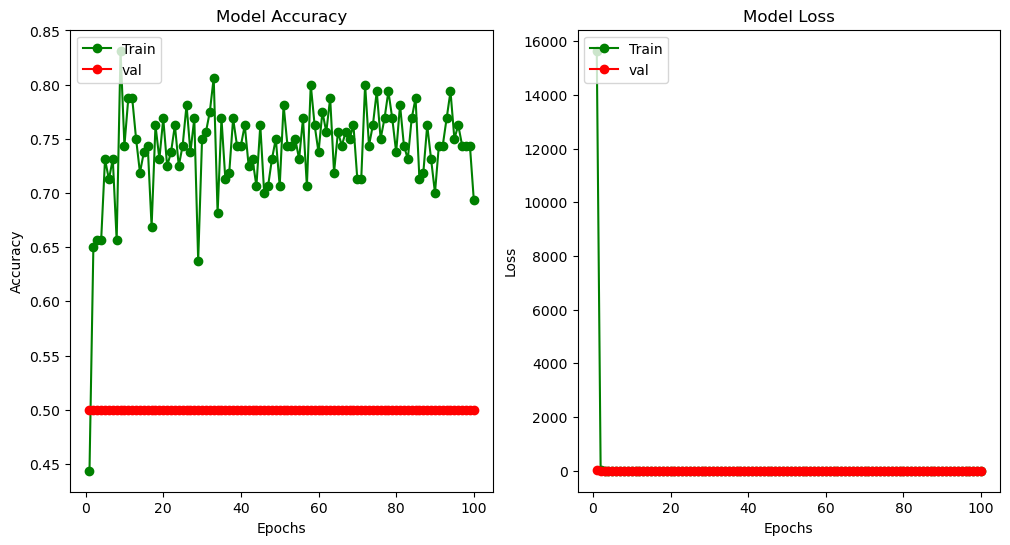

In [90]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_StandardCNN_ExperimentNo2.history["accuracy"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo2.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_StandardCNN_ExperimentNo2.history["loss"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo2.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 3: (Model A)

We adjust the number of neurons to 256.

In [91]:
StandardCNN_model_experimentN03 = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')
    
])
StandardCNN_model_experimentN03.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 256)       18688     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 256)       590080    
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 6, 6, 256)      

In [92]:
StandardCNN_model_experimentN03.compile(optimizer=Adam(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
StandardCNN_checkpoint_experimentNo3 = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [94]:
start = time.time()
History_StandardCNN_ExperimentNo3 = StandardCNN_model_experimentN03.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [StandardCNN_checkpoint_experimentNo3])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 13995.2402 - accuracy: 0.5375
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 235ms/step - loss: 13995.2402 - accuracy: 0.5375 - val_loss: 84.0049 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 179.3653 - accuracy: 0.6125
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 205ms/step - loss: 179.3653 - accuracy: 0.6125 - val_loss: 62.0109 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 31.2036 - accuracy: 0.6687
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 213ms/step - loss: 31.2036 - accuracy: 0.6687 - val_loss: 33.3788 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 28.7070 - accuracy: 0.5063
Epoch 4: val_accuracy d

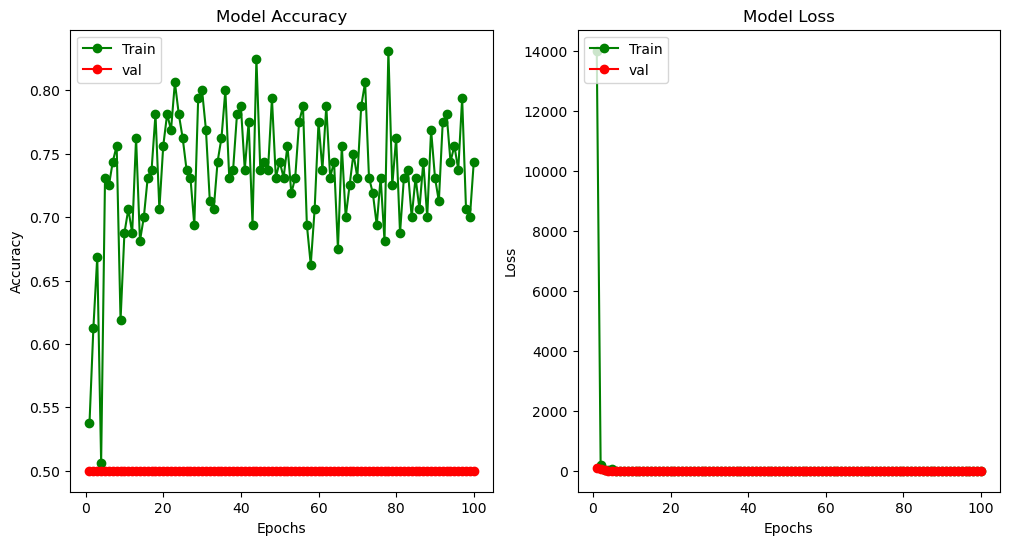

In [95]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_StandardCNN_ExperimentNo3.history["accuracy"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo3.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_StandardCNN_ExperimentNo3.history["loss"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo3.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 4: (Model A)

We adjust the learning rate to 0.1.

In [96]:
StandardCNN_model_experimentN04 = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')
   
])
StandardCNN_model_experimentN04.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 6, 6, 64)       

In [97]:
StandardCNN_model_experimentN04.compile(optimizer = Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
StandardCNN_checkpoint_experimentNo4 = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [99]:
start = time.time()
History_StandardCNN_ExperimentNo4 = StandardCNN_model_experimentN04.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [StandardCNN_checkpoint_experimentNo4])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 20537.0898 - accuracy: 0.4688
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 228ms/step - loss: 20537.0898 - accuracy: 0.4688 - val_loss: 10.2431 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 2.1809 - accuracy: 0.6875
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 198ms/step - loss: 2.1809 - accuracy: 0.6875 - val_loss: 0.8096 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.6063 - accuracy: 0.6625
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 198ms/step - loss: 0.6063 - accuracy: 0.6625 - val_loss: 1.2659 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.6812
Epoch 4: val_accuracy did not im

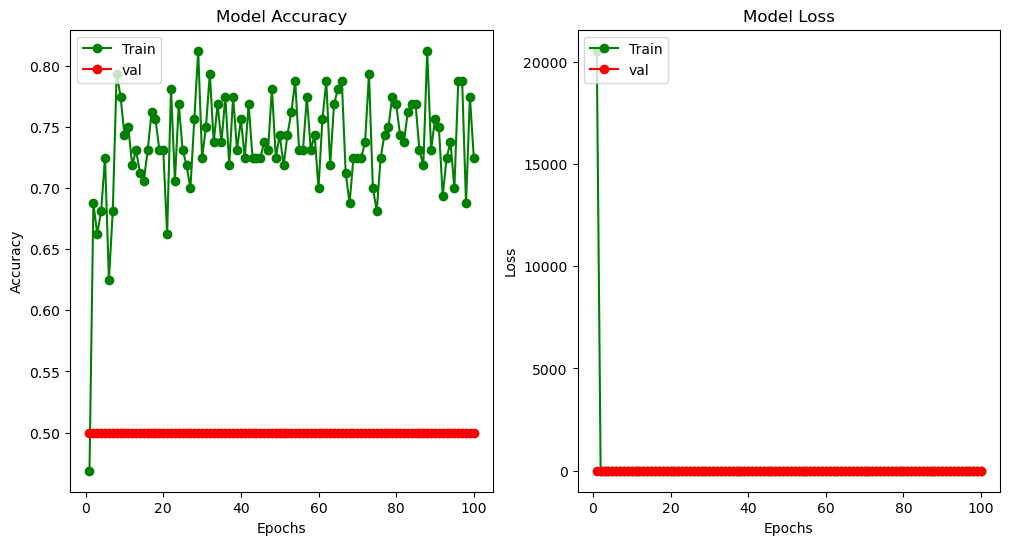

In [100]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_StandardCNN_ExperimentNo4.history["accuracy"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo4.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_StandardCNN_ExperimentNo4.history["loss"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo4.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 5: (Model A)

We adjust the learning rate to 0.01.

In [101]:
StandardCNN_model_experimentN05 = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')
   
])
StandardCNN_model_experimentN05.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 6, 6, 64)       

In [102]:
StandardCNN_model_experimentN05.compile(optimizer = Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
StandardCNN_checkpoint_experimentNo5 = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [104]:
start = time.time()
History_StandardCNN_ExperimentNo5 = StandardCNN_model_experimentN05.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [StandardCNN_checkpoint_experimentNo5])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 2.4085 - accuracy: 0.7125
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 235ms/step - loss: 2.4085 - accuracy: 0.7125 - val_loss: 0.9613 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.6166 - accuracy: 0.7000
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 197ms/step - loss: 0.6166 - accuracy: 0.7000 - val_loss: 0.7304 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.6185 - accuracy: 0.7063
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 184ms/step - loss: 0.6185 - accuracy: 0.7063 - val_loss: 0.7907 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.5634 - accuracy: 0.7563
Epoch 4: val_accuracy did not improve fro

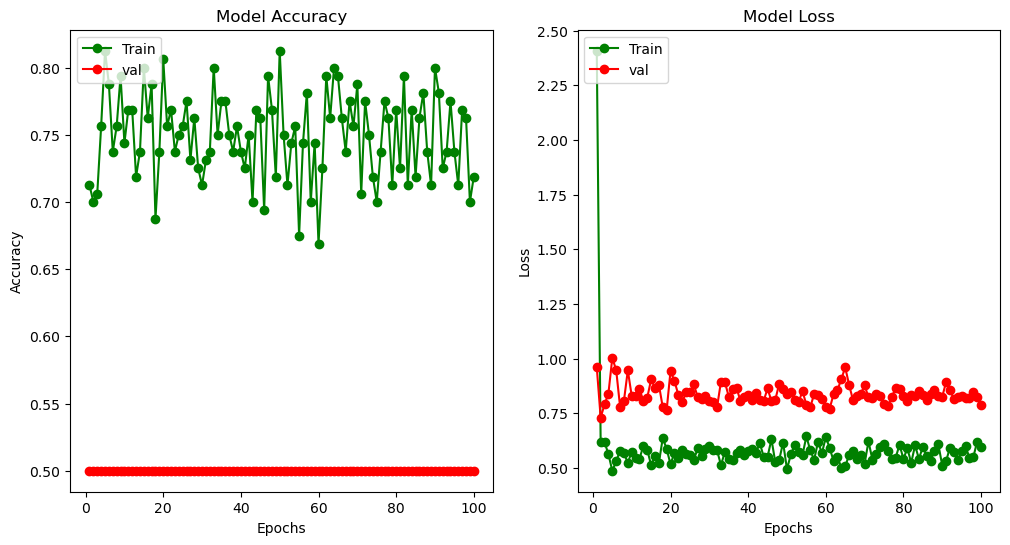

In [105]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_StandardCNN_ExperimentNo5.history["accuracy"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo5.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_StandardCNN_ExperimentNo5.history["loss"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo5.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 6: (Model A)

We adjust the learning rate to 0.001.

In [106]:
StandardCNN_model_experimentN06 = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')
   
])
StandardCNN_model_experimentN06.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 6, 6, 64)       

In [107]:
StandardCNN_model_experimentN06.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [108]:
StandardCNN_checkpoint_experimentNo6 = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [109]:
start = time.time()
History_StandardCNN_ExperimentNo6 = StandardCNN_model_experimentN06.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [StandardCNN_checkpoint_experimentNo6])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6040 - accuracy: 0.7188
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 196ms/step - loss: 0.6040 - accuracy: 0.7188 - val_loss: 0.7569 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.7500
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 170ms/step - loss: 0.5876 - accuracy: 0.7500 - val_loss: 0.9325 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.7625
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 177ms/step - loss: 0.5734 - accuracy: 0.7625 - val_loss: 0.7586 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.5597 - accuracy: 0.7688
Epoch 4: val_accuracy did not improve fro

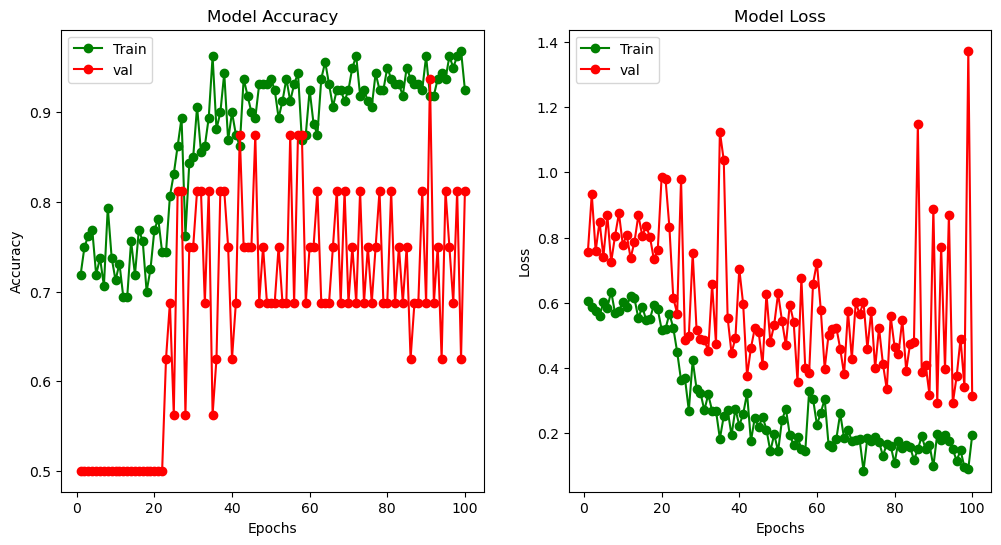

In [110]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_StandardCNN_ExperimentNo6.history["accuracy"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo6.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_StandardCNN_ExperimentNo6.history["loss"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo6.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

## Experiment number 7: (Model A)

We adjust the learning rate to 0.0001.

In [111]:
StandardCNN_model_experimentN07 = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=2, activation='softmax')
   
])
StandardCNN_model_experimentN07.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 6, 6, 64)       

In [112]:
StandardCNN_model_experimentN07.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
StandardCNN_checkpoint_experimentNo7 = ModelCheckpoint("cnn_model_1.h5", monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)

In [114]:
start = time.time()
History_StandardCNN_ExperimentNo7 = StandardCNN_model_experimentN07.fit(
      Train_DataGen,
      steps_per_epoch=10,  
      epochs=100,
      validation_data = Val_DataGen,
      verbose=1,
      callbacks = [StandardCNN_checkpoint_experimentNo7])
end = time.time()
print('Execution Time:', end - start)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6518 - accuracy: 0.7125
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to cnn_model_1.h5
10/10 [==============================] - 3s 193ms/step - loss: 0.6518 - accuracy: 0.7125 - val_loss: 0.7313 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.5804 - accuracy: 0.7500
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 193ms/step - loss: 0.5804 - accuracy: 0.7500 - val_loss: 0.8585 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7500
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 2s 194ms/step - loss: 0.5719 - accuracy: 0.7500 - val_loss: 0.9042 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.5451 - accuracy: 0.7688
Epoch 4: val_accuracy did not improve fro

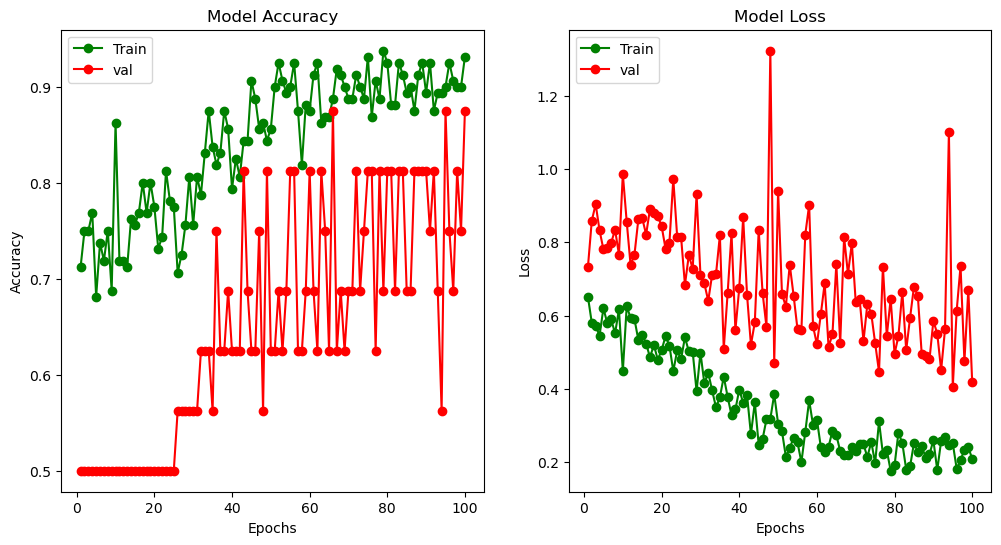

In [115]:
fig = plt.figure(figsize=(12,6))
epochs = range(1,101)
plt.subplot(1,2,1)
plt.plot(epochs,History_StandardCNN_ExperimentNo7.history["accuracy"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo7.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,History_StandardCNN_ExperimentNo7.history["loss"],"go-")
plt.plot(epochs,History_StandardCNN_ExperimentNo7.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

No improvement on The starndard Convolutional Neural Network while changing the hyperparameters (Neural and learning rate). We will consider the first predictions we made while training the model for the first time as it have a better accuracy of 95%.

## In Summary:

The starndard Convolutional Neural Network was trained using the X-ray images to detect the Pneumonia disease. The model accuracy went up to 0.95%. Which is a good accuracy. The model did not performed well during the experiments. The experiments focused on the hyperparameters adjestment on (Lerning rate and neural). The hyperarameters did not improved the model during our training.

The Bayesian Convolutional neural network was also trained using the same dataset. The model accuracy was 0.61% during the training. We conducted the experiments where the hyperparameters tune was (Learning rate and neural). The model managed to improve the accuracy to 0.96% on the experiment number 7.

### Conclusion

This project aimed to detect the Pnuemonia disease with the use of two models: starndard Convolutional Neural Network, and Bayesian Convolutional neural network. Due to the notebook results, both models performed well with 0.96% accuracy on Bayesian CNN and 0.95% accuracy on starndard CNN. The models can also help to reduce time comsuming, complex procedure and error prone to detect or identify the pneumonia disease. This project is based on the medical field. With this reason in mind, we consider the implementation of the Bayesian Convolutional neural network. The reason behind this is that the Bayesian Convolutional neural network calculate the uncertainty when it comes to its predictions of the image disease. This is important in the healthcare sector since a wrong diagnosis might have catastrophic consequences. Another reason is that the Bayesian Convolutional neural network works well on any dataset size no matter the dataset is large or small. The Bayesian Convolutional neural network enhance the accuracy of computerized diagnosis by taking uncertainty into account and extracting crucial information from various sources of data, including medical aspects, and X-ray images.